## This notebook is a very basic introduction to tensorflow.
### scalar: a single number
### vector: a 1D array of numbers
### matrix: a 2D array of numbers
### tensor: an array of numbers, any number of dimensions

In [1]:
# choose tensorflow version 2.12.0 for this project
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.12.0


In [2]:
# create tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# check the number of dimensions of a tensor
scalar.ndim

0

In [4]:
# create a vector
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [5]:
# check the number of dimensions of a vector
vector.ndim

1

In [6]:
# create a matrix in which has 1 more dimension
matrix = tf.constant([[10, 7],
                     [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [7]:
matrix.ndim

2

In [8]:
# create another matrix in which has 1 more dimension, with float16 data type as it takes less memory
matrix2 = tf.constant([[10., 7.],
                       [7., 10.],
                       [3., 2.]], dtype=tf.float16)
matrix2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 7., 10.],
       [ 3.,  2.]], dtype=float16)>

In [9]:
# create a tensor with more than 2 dimensions
tensor = tf.constant([[[1, 2, 3],
                      [4, 5, 6]],
                     [[7, 8, 9],
                      [10, 11, 12]],
                     [[13, 14, 15],
                      [16, 17, 18]]])
tensor.ndim # this is a 3-dimensional tensor

3

## Create tensors with 'tf.variable'

In [16]:
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [18]:
# try to change the elements in the changeable tensor
# changeable_tensor[0] = 7
# we cannot change the elements by variable assignment
changeable_tensor[0].assign(7)
changeable_tensor # the first element has been changed to 7

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [19]:
# change the elements in the unchangeable tensor by method assign
unchangeable_tensor[0].assign(7) # this will raise an error, as tensors created by tf.constant() are unchangeable

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

## Create random tensors with 'tf.random'

### tf.random is tensor of user defined shape and random values. For some deep learning models, we need to initialize weights and biases with random values.

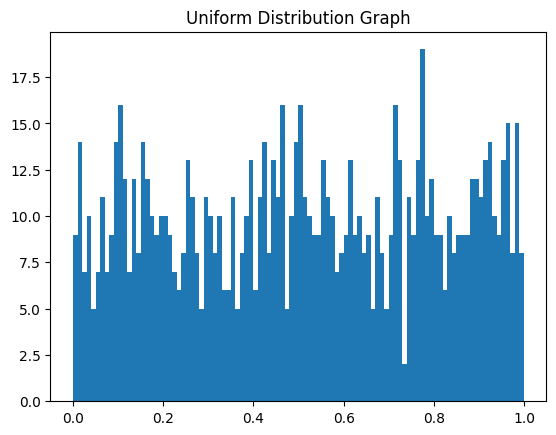

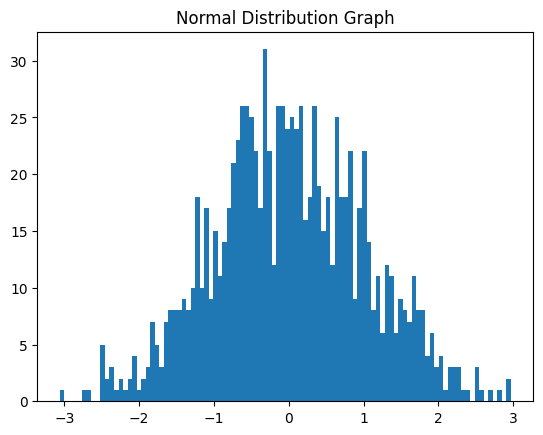

In [31]:
# generate a uniform distribution graph, normal distribution graph to clairify the concept of random tensors
import matplotlib.pyplot as plt

# create uniform distribution graph, it means each value in the tensor has the same probability to be chosen
uniform_tensor = tf.random.uniform([1000], minval=0, maxval=1)
plt.hist(uniform_tensor, bins=100)
plt.title("Uniform Distribution Graph")
plt.show()

# create normal distribution graph, it means the values in the tensor are more likely to be around the mean value
normal_tensor = tf.random.normal([1000], mean=0, stddev=1)
plt.hist(normal_tensor, bins=100)
plt.title("Normal Distribution Graph")
plt.show()

In [33]:
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.uniform(shape=(3, 2)) # create a tensor with random numbers, having uniform distribution
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2)) # normal distribution
random_1, random_2, random_1 == random_2 # the two tensors are different, as they are generated by different distributions

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.7493447 , 0.73561966],
        [0.45230794, 0.49039817],
        [0.1889317 , 0.52027524]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

## Shuffle tensors with 'tf.random.shuffle'
### Reasons for shuffling a tensor: to ensure that the inheriate order will not affect the deep learning process. For example, if we are training a model to recognize images of cats and dogs, we don't want the model to learn from the order of the images. We want the model to learn from the images themselves.

In [35]:
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
not_shuffled.ndim, not_shuffled

(2,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]])>)

In [47]:
# shuffle the tensor order along its first dimension, hence it won't change the shape of the tensor
shuffled = tf.random.shuffle(not_shuffled)
shuffled.ndim, shuffled

(2,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 3,  4],
        [ 2,  5],
        [10,  7]])>)

### Testing different method of assigning seeds to tensor shuffling.

In [54]:
# testing the different method of assigning seed to the random generator
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled) # the order of the tensor will be the same whatever it runs

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]])>

In [53]:
# testing the different method of assigning seed to the random generator without global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed, the result will be changed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [10,  7],
       [ 3,  4]])>